# Introduction to Computer Vision (ECSE 415)
# Assignment 1: Image Filtering
### Question 1.2: Sharpening
### Author: Antonios Valkanas

In [2]:
# Import useful libraries
import math, cv2
import numpy as np
import matplotlib.pyplot as plt

### 1.2.1 Sharpen the given image 'rice' (see Figure 2(a)) where, the blurred image is generated using 5 x 5 box filter. and  the blurred image is generated using 5 x 5 Gaussian filter with variance = 2.

([], <a list of 0 Text yticklabel objects>)

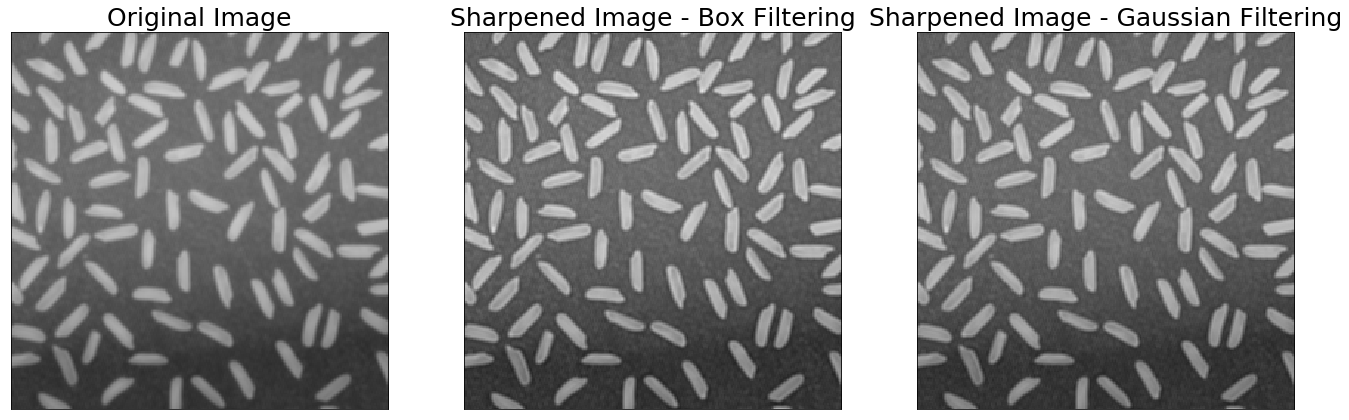

In [13]:
# Read in the image
rice_pic = cv2.imread('rice.png')

# Constants used to construct filters
filter_size = 5
variance = 2

# 5x5 box filter
kernel = np.ones((filter_size, filter_size), dtype = np.float32)
kernel /= filter_size*filter_size
box_filtered_rice_pic = cv2.filter2D(rice_pic, -1, kernel)

# 5x5 Gaussian filter with variance equal to 2
gaussian_filtered_rice_pic = cv2.GaussianBlur(rice_pic, (filter_size, filter_size), math.sqrt(variance))

# Now subtract the two blurred images above from the original image to create sharpened images.
box_sharpened_rice = rice_pic +(rice_pic - box_filtered_rice_pic)
gaussian_sharpened_rice = rice_pic + (rice_pic - gaussian_filtered_rice_pic)

# Plot the original along with the two sharpened versions of the image.
# Plotting the Figures
plt.figure(figsize=(23, 23))
plt.subplot(131)
plt.imshow(rice_pic)
plt.title('Original Image', fontsize = 25)
plt.xticks([]) # Removes x-axis number scale
plt.yticks([]) # Removes y-axis number scale
plt.subplot(132)
plt.imshow(box_sharpened_rice)
plt.title('Sharpened Image - Box Filtering', fontsize = 25)
plt.xticks([]) # Removes x-axis number scale
plt.yticks([]) # Removes y-axis number scale
plt.subplot(133)
plt.imshow(gaussian_sharpened_rice)
plt.title('Sharpened Image - Gaussian Filtering', fontsize = 25)
plt.xticks([]) # Removes x-axis number scale
plt.yticks([]) # Removes y-axis number scale
#plt.show()

### 1.2.2 Which of the two methods is expected to give better results and why? Can you observe expected result?

Theoretically, the box filter should have better results. The reason for this is because the gaussian filter is better at preserving local edges due to the fact that it acts as a local weighted average around each pixel. On the other hand, the box filter applies a universal average for the entire picture regardless of the local characteristics of each pixel's surroundings. As a result, edges are less pronounced after box filtering. This means that once the filtered image is subtracted from the original the gaussian filter will contain more information near the edge of objects which will be subtracted form the final result, resulting in a blurrier result. However, when the box filtered image is subtracted from the original it will not contain as much information near the edges of objects, causing the final output to have more pronounced edges and therefore appear sharper. In the particular example depicted in the previous part we can see that this rule holds true and the output of the box filtered image is sharper.